# Play with Mbs and Bandpasses

In [1]:
# Using this file, we can use "import litebird_sim" even if it is not installed system-wide
import fixpythonpath

In [2]:
import litebird_sim as lbs
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
import astropy

TOAST INFO: mpi4py not found- using serial operations only


In [3]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

## One channel

In [4]:
# Initialize the channel
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)

In [5]:
# Parameters of Mbs
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)

In [6]:
# Create the class and run the map generation
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
maps = mbs.run_all()[0]

[2023-08-01 09:04:13,006 INFO MPI#0000] generating and saving fg simulations
[2023-08-01 09:04:13,015 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-01 09:04:13,056 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:13,059 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:13,060 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:13,214 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-01 09:04:13,219 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:13,220 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:13,221 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:13,373 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-01 09:04:13,378 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:13,379 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:13,380 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:15,902 INFO MPI#0000] Sigma is 13.079556 arc

In [7]:
maps.keys()

dict_keys(['M1-140', 'Coordinates', 'Mbs_parameters'])

In [8]:
# numpy array with the healpix map
maps["M1-140"].shape

(3, 49152)

In [9]:
# Coordinates of the simulated maps
maps["Coordinates"]

<CoordinateSystem.Galactic: 2>

In [10]:
# Parameters of the Mbs simulations
maps["Mbs_parameters"]

MbsParameters(nside=64, save=False, gaussian_smooth=True, bandpass_int=False, coadd=True, parallel_mc=False, make_noise=False, nmc_noise=1, seed_noise=None, n_split=False, make_cmb=False, cmb_ps_file='', cmb_r=0.0, nmc_cmb=1, seed_cmb=None, make_fg=True, fg_models={'pysm_synch_0': 'pysm_synch_0', 'pysm_freefree_1': 'pysm_freefree_1', 'pysm_dust_0': 'pysm_dust_0'}, make_dipole=False, sun_velocity=None, output_string='date_230801', units='K_CMB', maps_in_ecliptic=False)

## Many channels

In [11]:
# Obtain the info about the instrument from the imo
instrument = lbs.InstrumentInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/instrument_info", imo=imo
)

In [12]:
# Create a list with all the channels
channels = list()
for ch in instrument.channel_names:
    print(ch)
    channels.append(
        lbs.FreqChannelInfo.from_imo(
            url="/releases/v1.3/satellite/MFT/" + ch + "/channel_info", imo=imo
        )
    )

M1-100
M2-119
M1-140
M2-166
M1-195


In [13]:
# Same as before but using the uuids
channels = list()
for uuid in instrument.channel_objs:
    channel = lbs.FreqChannelInfo.from_imo(url=uuid, imo=imo)
    print(channel.channel)
    channels.append(channel)

M1-100
M2-119
M1-140
M2-166
M1-195


In [14]:
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channels,
)
maps = mbs.run_all()[0]

[2023-08-01 09:04:20,197 INFO MPI#0000] generating and saving fg simulations
[2023-08-01 09:04:20,199 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-01 09:04:20,203 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:20,205 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:20,206 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:20,342 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-01 09:04:20,346 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:20,347 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:20,348 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:20,490 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-01 09:04:20,495 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:20,495 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:20,497 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:20,679 INFO MPI#0000] Sigma is 16.052182 arc

In [15]:
for k in maps.keys():
    print(k)

M1-100
M2-119
M1-140
M2-166
M1-195
Coordinates
Mbs_parameters


## Some detectors

In [16]:
# Now we create a list of detectors
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)
wafer = "M02"
orient = "45"
dets = []
for uuid in channel.detector_objs:
    det = lbs.DetectorInfo.from_imo(url=uuid, imo=imo)
    if (det.wafer == wafer) and (det.orient == orient):
        dets.append(det)

In [17]:
# We run as before but with detector_list instead of channel_list
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2023-08-01 09:04:22,292 INFO MPI#0000] generating and saving fg simulations
[2023-08-01 09:04:22,294 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-01 09:04:22,299 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:22,300 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:22,301 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:22,429 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-01 09:04:22,433 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:22,434 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:22,435 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:22,559 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-01 09:04:22,564 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:22,564 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:22,565 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:22,724 INFO MPI#0000] Sigma is 13.079556 arc

In [18]:
for k in maps.keys():
    print(k)

001_002_038_45B_140_B
001_002_041_45A_140_B
001_002_042_45B_140_B
001_002_047_45A_140_B
001_002_048_45B_140_B
001_002_052_45A_140_B
001_002_053_45B_140_B
001_002_056_45A_140_B
001_002_057_45B_140_B
001_002_060_45A_140_B
001_002_038_45B_140_T
001_002_041_45A_140_T
001_002_042_45B_140_T
001_002_047_45A_140_T
001_002_048_45B_140_T
001_002_052_45A_140_T
001_002_053_45B_140_T
001_002_056_45A_140_T
001_002_057_45B_140_T
001_002_060_45A_140_T
Coordinates
Mbs_parameters


## Now integrating over a top-hat bandpass

In [19]:
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)

In [20]:
# We generate maps with an without band integration
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsnoint = mbs.run_all()[0]

params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsint = mbs.run_all()[0]

[2023-08-01 09:04:28,518 INFO MPI#0000] generating and saving fg simulations
[2023-08-01 09:04:28,520 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-01 09:04:28,526 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:28,527 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:28,528 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:28,657 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-01 09:04:28,661 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:28,662 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:28,663 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:28,783 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-01 09:04:28,786 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:28,787 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:28,788 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:28,943 INFO MPI#0000] Sigma is 13.079556 arc

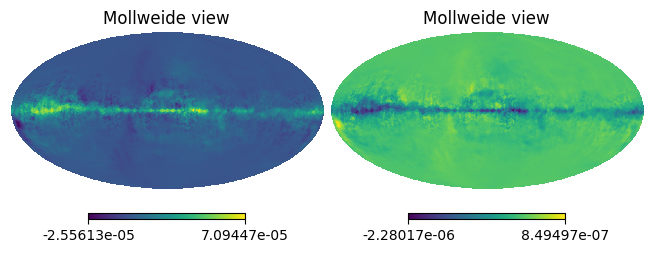

In [21]:
hp.mollview(mapsint["M1-140"][1], sub=121)
hp.mollview((mapsnoint["M1-140"] - mapsint["M1-140"])[1], sub=122)

## Now with a customized bandpass

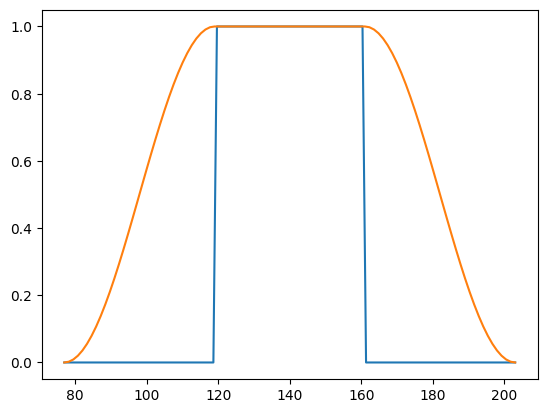

In [22]:
# We change the shape of the bands, in channel1 top-hat in channel2 top-hat with cosine tails

channel1 = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channel1.bandcenter_ghz,
    bandwidth_ghz=channel1.bandwidth_ghz,
    bandtype="top-hat-cosine",
    nsamples_inband=100,
)
channel2 = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)
channel2.band = band

plt.plot(channel1.band.freqs_ghz, channel1.band.weights, label="Ideal band")
plt.plot(channel2.band.freqs_ghz, channel2.band.weights, label="Ideal band")

In [23]:
# Here we do the comparison
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel1,
)
mapsth = mbs.run_all()[0]

mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel2,
)
mapsthc = mbs.run_all()[0]

[2023-08-01 09:04:31,788 INFO MPI#0000] generating and saving fg simulations
[2023-08-01 09:04:31,790 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-01 09:04:31,794 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:31,795 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:31,796 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:31,926 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-01 09:04:31,931 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:31,932 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:31,933 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:32,081 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-01 09:04:32,084 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:32,086 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:32,087 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:32,289 INFO MPI#0000] Removing 42/128 points

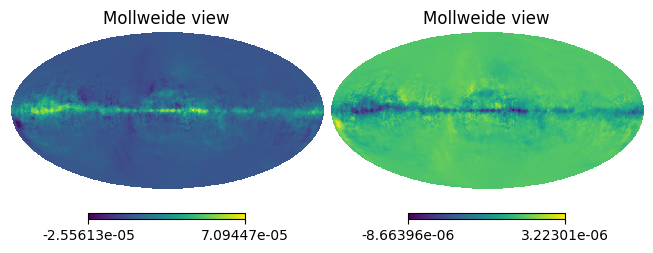

In [24]:
hp.mollview(mapsth["M1-140"][1], sub=121)
hp.mollview((mapsth["M1-140"] - mapsthc["M1-140"])[1], sub=122)

## Scan the sky

In [25]:
# Now we do a simple simulation of 1 hour with 4 detectors
telescope = "MFT"
channel = "M1-140"
detlist = [
    "001_002_060_45A_140_T",
    "001_003_000_75A_140_B",
    "001_003_001_15B_140_T",
    "001_003_002_60A_140_B",
]

In [26]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="./tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

Can't resample if no sampler is built and/or provided, initializing the sampler and interpolating the band


/home/tomasi/Documents/work/LiteBIRD/simulations/litebird_sim/litebird_sim/bandpasses.py:241: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]
/home/tomasi/Documents/work/LiteBIRD/simulations/litebird_sim/litebird_sim/bandpasses.py:241: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]


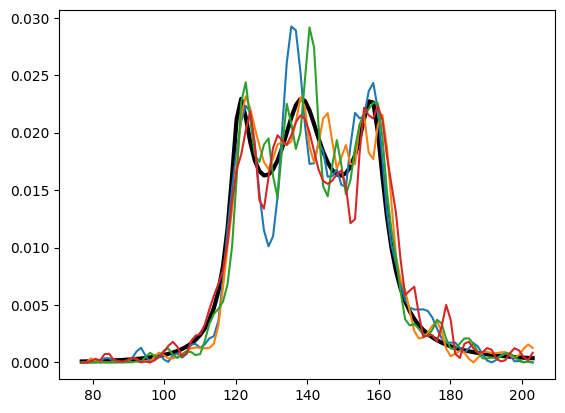

In [27]:
# Load the definition of the instrument (LFT)
sim.set_instrument(
    lbs.InstrumentInfo.from_imo(
        imo,
        f"/releases/v1.3/satellite/{telescope}/instrument_info",
    )
)

channelinfo = lbs.FreqChannelInfo.from_imo(
    imo, f"/releases/v1.3/satellite/{telescope}/{channel}/channel_info"
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channelinfo.bandcenter_ghz,
    bandwidth_ghz=channelinfo.bandwidth_ghz,
    bandtype="cheby",
    nsamples_inband=100,
    normalize=True,
)

plt.plot(band.freqs_ghz, band.weights, lw=3, color="k")

dets = []
for namedet in detlist:
    det = lbs.DetectorInfo.from_imo(
        url=f"/releases/v1.3/satellite/{telescope}/{channel}/{namedet}/detector_info",
        imo=imo,
    )
    det.quat = [0.0, 0.0, 0.0, 1.0]
    det.band = band
    det.fwhm_arcmin *= np.random.normal(1.0, 0.01)
    det.band.weights = band.bandpass_resampling()
    dets.append(det)
    plt.plot(band.freqs_ghz, det.band.weights)

In [28]:
sim.set_scanning_strategy(imo_url=f"/releases/v1.3/satellite/scanning_parameters/")

sim.create_observations(
    detectors=dets,
    n_blocks_det=1,
    n_blocks_time=1,  # blocks different from one if parallelizing
)

In [29]:
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2023-08-01 09:04:40,371 INFO MPI#0000] generating and saving fg simulations
[2023-08-01 09:04:40,373 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-01 09:04:40,378 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:40,379 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:40,380 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:40,538 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-01 09:04:40,543 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:40,544 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:40,546 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:40,677 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-01 09:04:40,681 INFO MPI#0000] NSIDE = 512
[2023-08-01 09:04:40,682 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-01 09:04:40,683 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-01 09:04:40,841 INFO MPI#0000] Removing 98/100 points

In [30]:
sim.set_hwp(
    lbs.IdealHWP(
        sim.instrument.hwp_rpm * 2 * np.pi / 60,
    ),
)
sim.compute_pointings()

In [31]:
sim.fill_tods(maps)

Text(0, 0.5, 'Signal [K]')

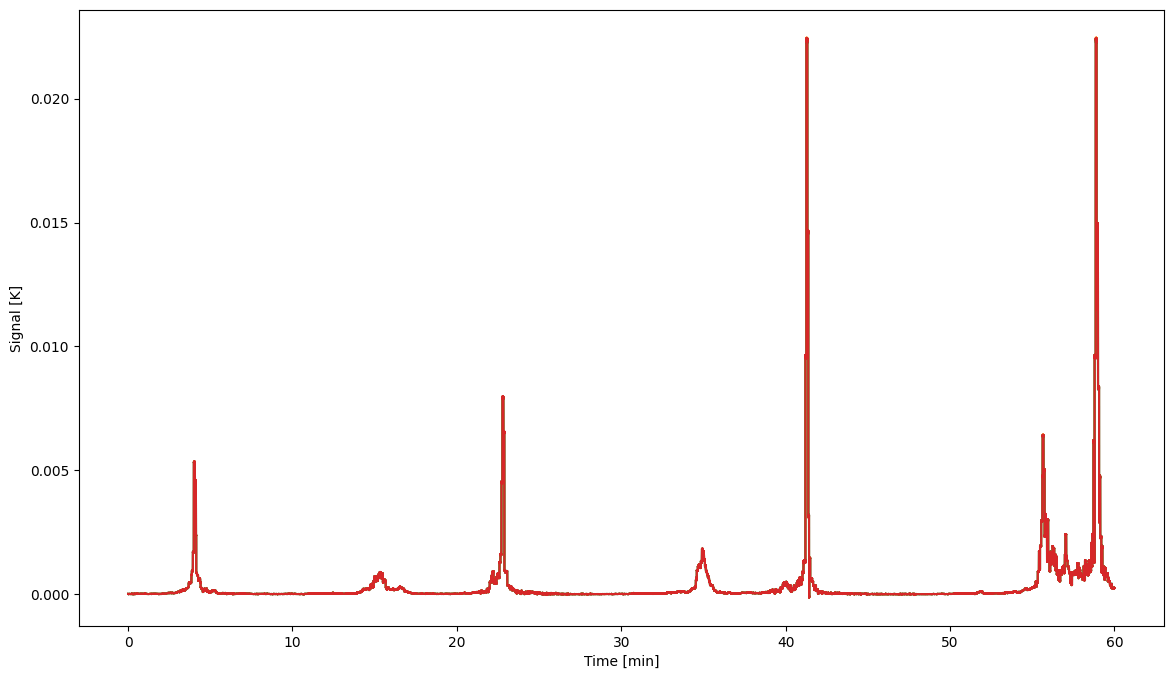

In [32]:
times_min = (sim.observations[0].get_times() - sim.observations[0].start_time) / 60.0
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1])
plt.plot(times_min, sim.observations[0].tod[2])
plt.plot(times_min, sim.observations[0].tod[3])

plt.xlabel("Time [min]")
plt.ylabel("Signal [K]")

Text(0, 0.5, '$\\Delta$ Signal [K]')

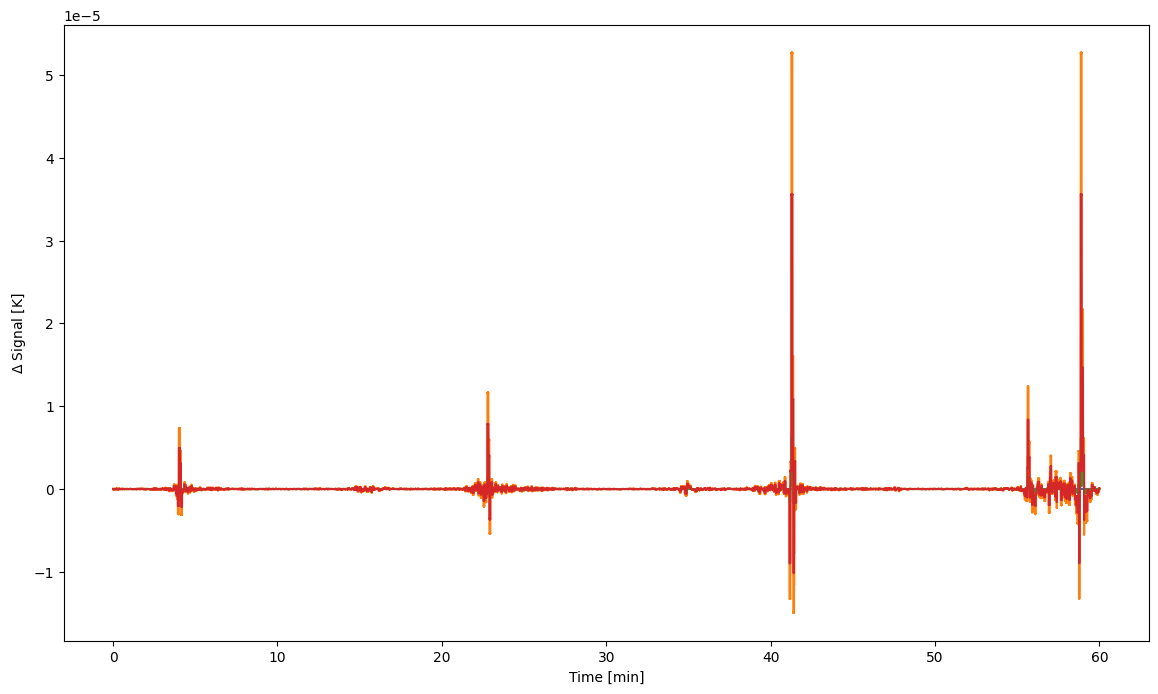

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[2] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[3] - sim.observations[0].tod[0])

plt.xlabel("Time [min]")
plt.ylabel(r"$\Delta$ Signal [K]")